In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [123]:
df = pd.read_csv("car data.csv")
df.shape

(301, 9)

In [124]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


| __Variable__   | __Description__ |
|     :---       |       :---      |
| Car_Name: | The name of the car. | 
| Year: | The year the car was manufactured. |
| Selling_Price: | The price at which the car was sold. (in Lakh) |
| Present_Price: | The present price or market value of the car.(In lakh) |
| Driven_kms: | The number of kilometers the car has been driven. |
| Fuel_Type: | The type of fuel used by the car (e.g., petrol, diesel, CNG). |
| Selling_type: | The type of selling (e.g., individual, dealer). |
| Transmission: | The type of transmission (e.g., manual, automatic). |
| Owner: | The number of previous owners of the car. |

In [126]:
df.duplicated().sum()

2

In [127]:
df.drop_duplicates(inplace=True)

* No Missing
* No duplicate

## EDA

In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.566332,0.32,1.20,6.10,9.84,92.6
Driven_kms,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


Text(0.5, 1.0, 'Car Age: ')

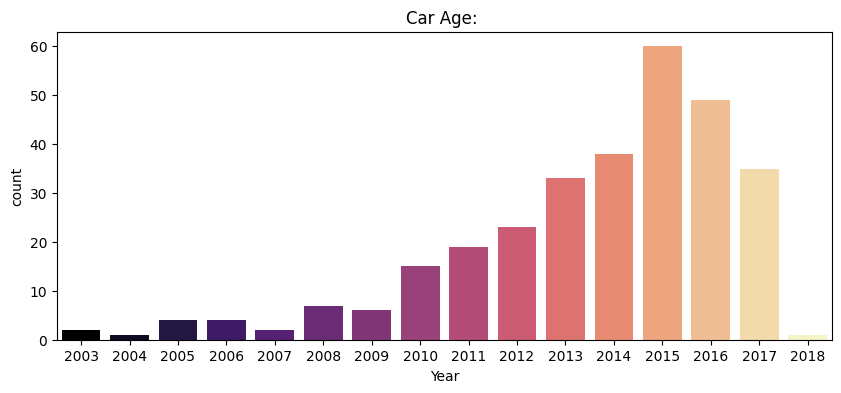

In [129]:
plt.figure(figsize=(10,4))

sns.countplot(x='Year',data=df, palette='magma',hue='Year',legend=False).set_title('Car Age: ')

Text(0.5, 1.0, 'Top 10 Selling Cars')

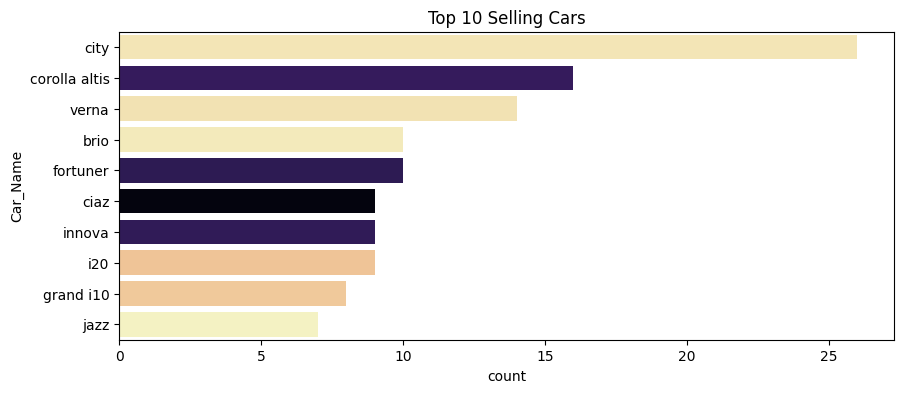

In [130]:
plt.figure(figsize=(10,4))
top_car = df['Car_Name'].value_counts().nlargest(10)
sns.countplot(y=df.Car_Name, order=top_car.index, hue=df.Car_Name, palette='magma',legend=False).set_title('Top 10 Selling Cars')

Text(0.5, 1.0, 'Variation of selling price with Age of Car')

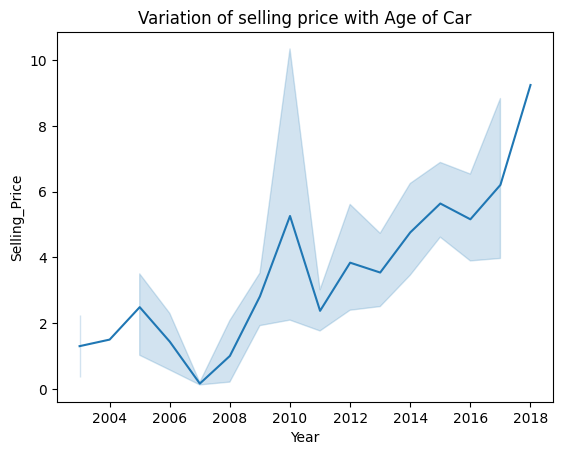

In [131]:
sns.lineplot(x='Year', y='Selling_Price', data=df).set_title('Variation of selling price with Age of Car')

In [132]:
fuel_type = ((df['Fuel_Type'].value_counts()) / len(df)) * 100
Owner_count = ((df['Owner'].value_counts()) / len(df)) * 100
selling_type = ((df['Selling_type'].value_counts()) / len(df)) * 100
transmission = ((df['Transmission'].value_counts()) / len(df)) * 100

print(fuel_type)
print(Owner_count)
print(selling_type)
print(transmission)

Fuel_Type
Petrol    79.933110
Diesel    19.397993
CNG        0.668896
Name: count, dtype: float64
Owner
0    96.321070
1     3.344482
3     0.334448
Name: count, dtype: float64
Selling_type
Dealer        64.548495
Individual    35.451505
Name: count, dtype: float64
Transmission
Manual       86.956522
Automatic    13.043478
Name: count, dtype: float64


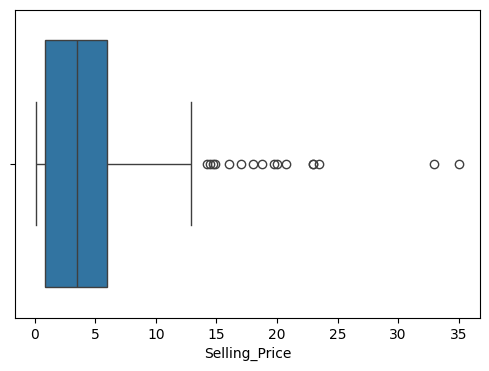

In [133]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Selling_Price'])
plt.show()

In [134]:
percentile_75 = np.percentile(df['Selling_Price'],75)
sum(df['Selling_Price']>percentile_75)

72

* Most of the car models are of 2015.
* Selling price is between 1 to 5 lakh and there are `72 cars` out of total cars having selling price more then 75_percentile.
* 79% cars are of petrol engine.
* 87 % cars are manual drive.

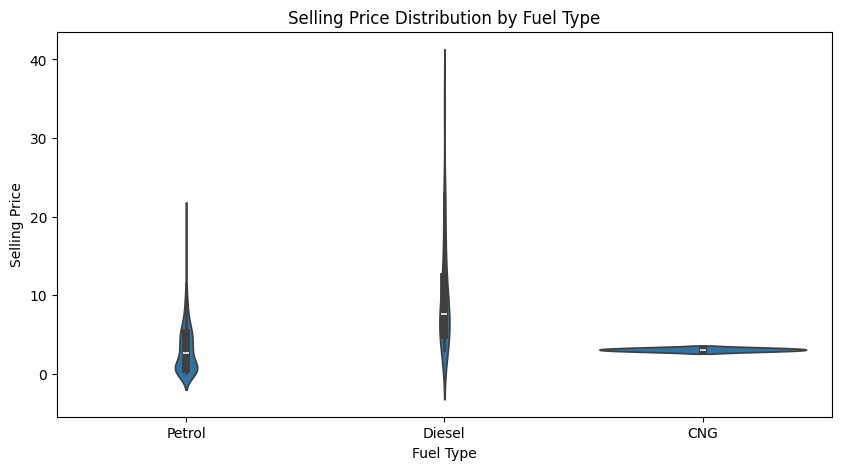

In [135]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.title('Selling Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

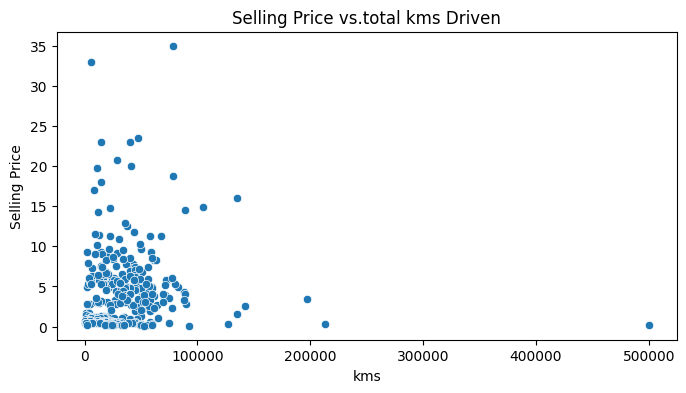

In [136]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price')
plt.title('Selling Price vs.total kms Driven')
plt.xlabel('kms')
plt.ylabel('Selling Price')
plt.show()


In [137]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<Axes: >

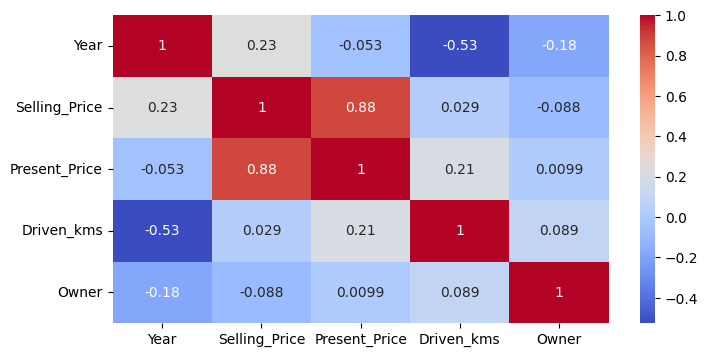

In [138]:
numeric_cols = df[['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']]
plt.figure(figsize=(8, 4))
sns.heatmap(data=numeric_cols.corr(), annot=True, cmap='coolwarm')

In [139]:
import scipy.stats as stats

car_name = df['Car_Name']
fuel_type = df['Fuel_Type']
selling_type = df['Selling_type']
transmission = df['Transmission']
target_variable = df['Selling_Price']

# Performing ANOVA test for each categorical variable
for cat_var in [car_name, fuel_type, selling_type, transmission]:
    # Perform ANOVA
    anova_results = stats.f_oneway(*[target_variable[cat_var == category] for category in cat_var.unique()])
    print("Categorical Variable:", cat_var.name)
    print("ANOVA F-statistic:", anova_results.statistic)
    print("ANOVA p-value:", anova_results.pvalue)


Categorical Variable: Car_Name
ANOVA F-statistic: 7.885535079204509
ANOVA p-value: 8.187465530792223e-35
Categorical Variable: Fuel_Type
ANOVA F-statistic: 62.06124989163076
ANOVA p-value: 3.1012300197763483e-23
Categorical Variable: Selling_type
ANOVA F-statistic: 131.4171928477555
ANOVA p-value: 1.9528990275162138e-25
Categorical Variable: Transmission
ANOVA F-statistic: 41.15681279129021
ANOVA p-value: 5.532298979959462e-10


* it appears that the categorical variables in our dataset have a statistically significant impact on the selling prices. 

* The low p-values obtained from the tests indicate that the mean selling prices vary significantly across different categories of each categorical variable.

## Data Preprocessing

In [140]:
# Creating Label Encoder object
le = LabelEncoder()
# Converting categorical col into numerical using LabelEncoder
cols = df.select_dtypes(include='object').columns
for i in cols:
    df[i] = le.fit_transform(df[i])
    print(i, df[i].unique())

Car_Name [90 93 68 96 92 95 91 62 76 73 63 85  0 65 89 81 86 71 77 78 80 70 79 67
 88 49 56 42 11 46 43 40 48 41 44 17 45 47  6  4 32 60 58 51 14 37 20  7
  5 57 12 15 52 26 16 61 31 54 38  8 28  1 25 34 59 13  2 35 22 39 30 53
 23 27 33  9 50 55 36 21 29 10 24 19 18  3 84 82 83 75 97 74 72 94 69 66
 64 87]
Fuel_Type [2 1 0]
Selling_type [0 1]
Transmission [1 0]


In [141]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [142]:
X= df.drop('Selling_Price', axis=1)
y= df['Selling_Price']
print(X.shape)
print(y.shape)

(299, 8)
(299,)


In [143]:
from sklearn.model_selection import train_test_split

### Train Test Split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=35)

### Normalization

In [145]:
scaler = StandardScaler()

X_train_s= scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

## Price Prediction

I will be using the following models:

* Linear Regression
* Random Forest Regressor
* Decision Tree Regressor
* MLP Regressor

## Model Building

In [146]:
model=LinearRegression()
model.fit(X_train_s,y_train)
lr_pred = model.predict(X_test_s)

In [147]:
rfr = RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train_s,y_train)
rfr_pred = rfr.predict(X_test_s)

In [148]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train_s,y_train)
dtr_pred = dtr.predict(X_test_s)

In [149]:
mlpr = MLPRegressor(hidden_layer_sizes=(100,),max_iter=1000,random_state=42)
mlpr.fit(X_train_s,y_train)
mlpr_pred = mlpr.predict(X_test_s)

# Model Evaluation

In [150]:
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": lr_pred,
    "Random Forest Regressor": rfr_pred,
    "Decision Tree Regressor": dtr_pred,
    "MLP Regressor": mlpr_pred
}
mse_scores = {}
r2_scores = {}
for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Storing metrics in dictionaries
    mse_scores[model_name] = mse
    r2_scores[model_name] = r2
    
    # Print metrics
    print(f"{model_name}:")
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)


Linear Regression:
Mean Squared Error: 2.8032308209943406
R2 Score: 0.8682360704653616
Random Forest Regressor:
Mean Squared Error: 0.6619085101666692
R2 Score: 0.9688874474271647
Decision Tree Regressor:
Mean Squared Error: 1.234848333333333
R2 Score: 0.9419568065673649
MLP Regressor:
Mean Squared Error: 0.7143044651925989
R2 Score: 0.96642461173264


<Axes: xlabel='Selling_Price', ylabel='Density'>

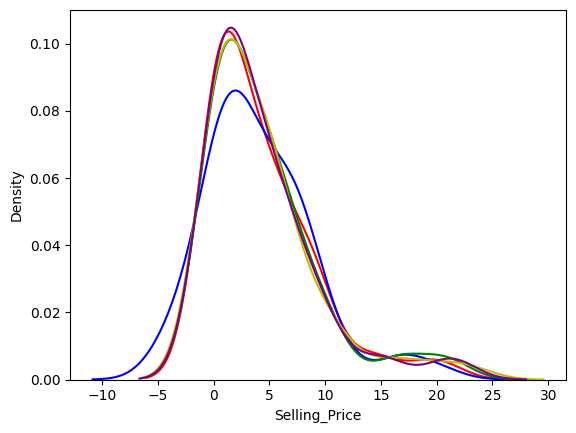

In [151]:
ax = sns.kdeplot(y_test, color='r', label='Actual')
#descision tree regressor
sns.kdeplot(lr_pred, color='b', label='Predicted', ax=ax)
#random forest regressor
sns.kdeplot(rfr_pred, color='g', label='Predicted', ax=ax)
#Decision Tree Regressor
sns.kdeplot(dtr_pred, color='y', label='Predicted', ax=ax)
#MLP Regressor
sns.kdeplot(mlpr_pred, color='purple', label='Predicted', ax=ax)